In [1]:
import pickle
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# hide warnigns for clarity
import warnings
warnings.filterwarnings('ignore')

from plotting_utils import *
setup_formatting()

# cheetah

### config

In [2]:
# path to data directory
path_dir = '../data/'

save_figs = False
save_folder = './cheetah_figs/'

envs = ['_rew5','_H10', '_H10_alpha5']
methods = ['sac_orig','mppi','maxdiff']
plot_legend = ['SAC','NN-MPPI','MaxDiff']

### reward curves

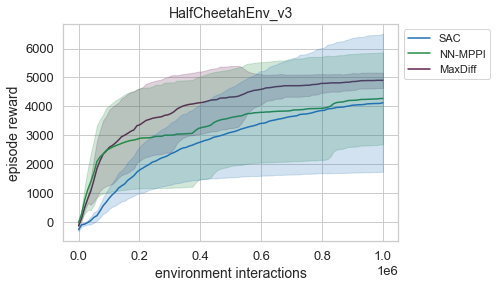

In [3]:
fill = True
plot_max = True

num_colors = 3
for base_env,ylims in zip(['HalfCheetahEnv_v3'],[[-150,200]]):
    for data_file,data_type in zip(['reward_data.pkl'],['train']):
        fig, axs = plt.subplots(1, 1)
        colors = {}
        colors['sac_orig'] = iter(sns.color_palette("Blues_r",n_colors=num_colors))
        colors['mppi'] = iter(sns.color_palette("Greens_r",n_colors=num_colors))
        colors['maxdiff'] = iter(sns.color_palette('rocket',n_colors=num_colors))
        for env_idx,(env,method,lgd) in enumerate(zip(envs,methods,plot_legend)):
            data_path = path_dir + '{}/{}/'.format(method, base_env + env)
            data = process_data(data_path,N=100,get_max=plot_max,data_file=data_file)
            plot_data(axs, data, lgd,color=next(colors[method]),fill=fill,zorder=10-env_idx,linewidth=1.5)
            axs.tick_params(axis='both', which='major')

        axs.set_title(base_env)
        axs.set_xlabel( 'environment interactions')
        axs.set_ylabel('episode reward')
        axs.legend(bbox_to_anchor=(1.0,1.0), loc="upper left", ncol=1)
        if save_figs:
            title = 'max' if plot_max else 'mean'
            plt.savefig(f'{save_folder}{base_env}_{title}_combo.svg', bbox_inches='tight')
        plt.show()

### comparison by learning algorithm

In [6]:
base_env_list = ['HalfCheetahEnv_v3'] 
envs_lgd_mod_list = ['Short Legs'] 
ls_list = ['solid'] 

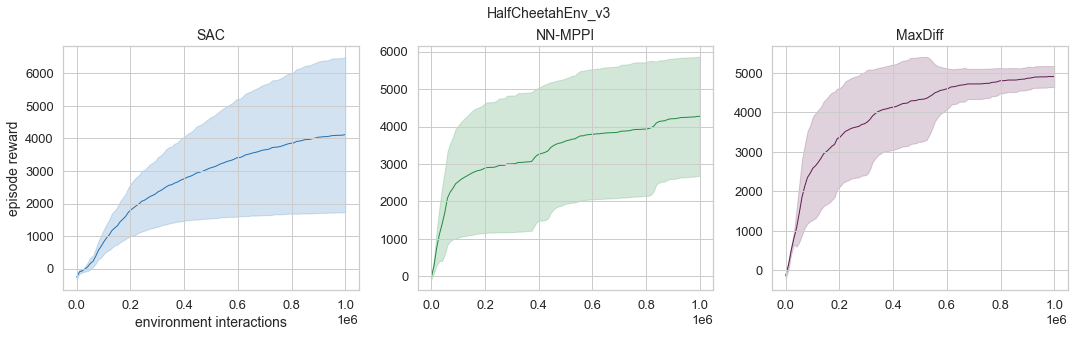

In [7]:
num_colors=3
fig, axss = plt.subplots(1, 3, figsize=(18,4.5) )
for axs,env,method,lgd in zip(axss,envs,methods,plot_legend):
    colors = {}
    colors['sac_orig'] = sns.color_palette("Blues_r",n_colors=num_colors)
    colors['mppi'] = sns.color_palette("Greens_r",n_colors=num_colors)
    colors['maxdiff'] = sns.color_palette('rocket',n_colors=num_colors)
    for env_idx, (base_env,envs_lgd_mod,ls) in enumerate(zip(base_env_list,envs_lgd_mod_list,ls_list)):
        data_path = path_dir + '{}/{}{}/'.format(method,base_env,env)
        data = process_data(data_path,N=100,get_max=plot_max)
        plot_data(axs, data, envs_lgd_mod,color=colors[method][env_idx],fill=True,raw=False,linestyle=ls)
        axs.tick_params(axis='both', which='major')

plt.suptitle('HalfCheetahEnv_v3',y=1.0)
titles = plot_legend 
xlabs  = ['environment interactions','','']
ylabs  = ['episode reward','','']
for axs,title,xlab,ylab,loc in zip(axss,titles,xlabs,ylabs,['upper left','upper left','lower right']): 
    axs.set_title(title)
    axs.set_xlabel(xlab)
    axs.set_ylabel(ylab)
if save_figs: 
    title = 'max' if plot_max else 'mean'
    plt.savefig(f'{save_folder}AntEnv_v3_compWeightSubplots.svg', bbox_inches='tight')
plt.show()